# Step1:
Data Cleaning , data import and reading


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

In [4]:
loan = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip")
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

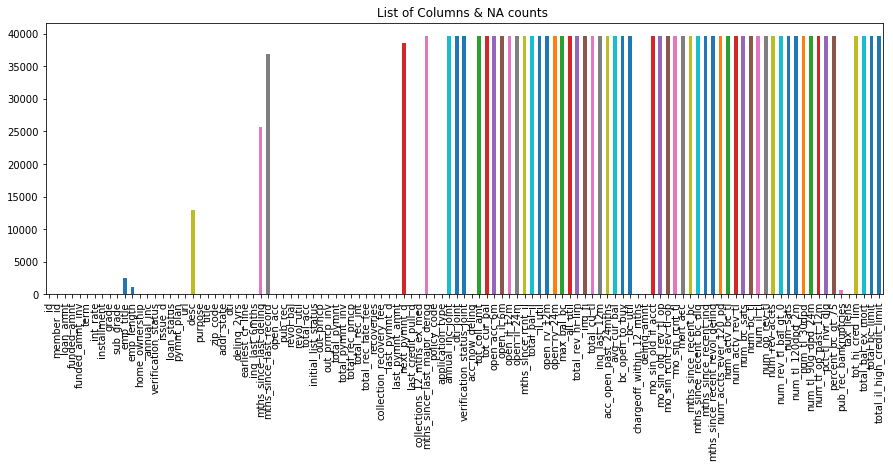

In [6]:
#graph to show the number of columns having all NA values and hence to show the need for data cleaning in order to have smaller and relevant data frame
null_col = loan.isnull().sum()
plt.figure(figsize=(15,5))
null_col.plot(kind='bar')
plt.title('List of Columns & NA counts ')
plt.show()

In [22]:
invest = loan['issue_d'].str.split('-',expand=True)
loan['issue_month']= invest[0]
loan['issue_year'] = invest[1]
loan


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [23]:
loan['int_rate'] = loan['int_rate'].map(lambda x: str(x)[:-1])
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

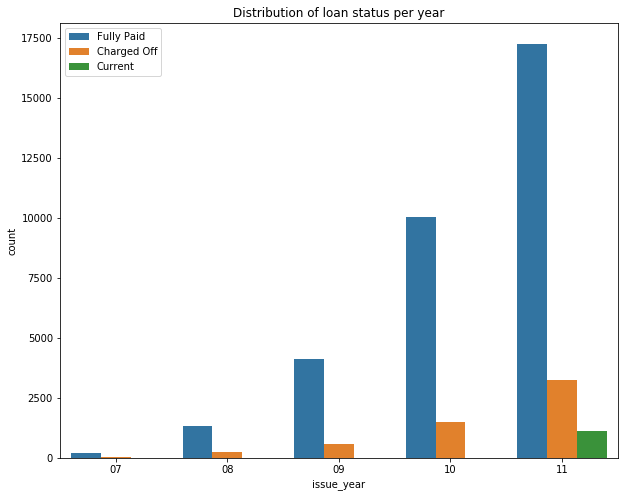

In [67]:
#distribution of loan status based on the loan issue year

plt.figure(figsize=(10, 8))
a = sns.countplot(x="issue_year", hue = "loan_status", data=loan)
plt.title('Distribution of loan status per year')
plt.legend(loc='upper left')
plt.show()

In [68]:
numeric_workable_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan[numeric_workable_columns] = loan[numeric_workable_columns].apply(pd.to_numeric)
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

creating range of loan amount

In [69]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
Range = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_range'] = pd.cut(loan['loan_amnt'], bins, labels=Range)
loan


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

creating range of annual income

In [70]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
Range = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_range'] = pd.cut(loan['annual_inc'], bins, labels=Range)
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [72]:
bins = [0, 5, 10, 15,20,25]
Range = ['0-5', '5-10', '10-15', '15-20', '20 and above']
loan['int_range'] = pd.cut(loan['int_rate'], bins, labels=Range)
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [73]:
(loan.isnull() .sum() * 100 / loan.index.size).round(2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [74]:
#dropping all the columns that have all NULL values as part of data cleaning

loan=loan.dropna(axis=1, how='all')
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

In [75]:
loan.shape

(39717, 62)

In [108]:
loan.to_excel("output.xlsx")  #output file to load to tableau to create tableau plots in order to create the presentation

In [76]:
loan=loan.dropna(axis=0, how='all')
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
14     1069057    1303503      10000        10000      10000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
27     1069657    1304764       5000         5000       5000.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
...        ...        ...        ...          ...              ...   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39692    76597      76583       5000         5000       1775.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92390       5000         5000        700.00000   
39712    92187      92

Removing columns which have unique values as they won't be needed for further analysis

In [77]:
unique = loan.nunique()
unique = unique[unique.values == 1]
loan.drop(labels = list(unique.index), axis =1, inplace=True)
print("So we have now",loan.shape ,"rows & columns.")

So we have now (39717, 53) rows & columns.


There are some values in emp_term which are 'null', we assume that are 'self-employed'. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable' so====

In [78]:
loan.emp_length.fillna('0',inplace=True)
loan.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


In [79]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

loan status

In [81]:
del_loan_status = (loan.loan_status.value_counts()*100)/len(loan)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]

loan.drop(labels = loan[loan.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we have",loan.shape ,"rows & columns.")

print(loan.loan_status.unique())

So now we have (39717, 53) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


# Univariate analysis
COUNT PLOTS BASED ON PARAMETER VALUES

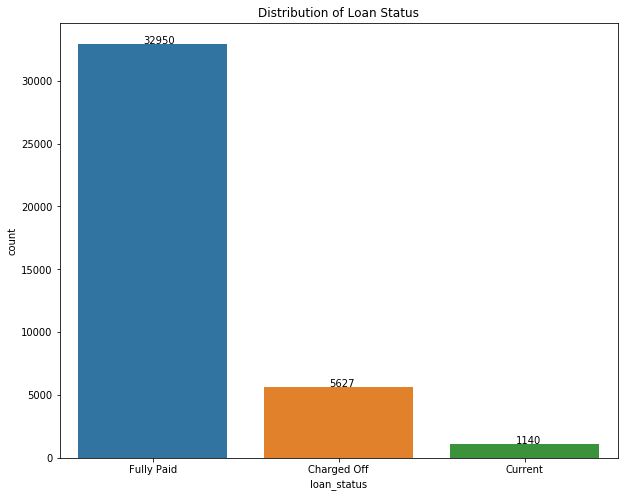

In [112]:
plt.figure(figsize=(10, 8))
a = sns.countplot(x="loan_status", data=loan)
plt.title('Distribution of Loan Status')
for p in a.patches:
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

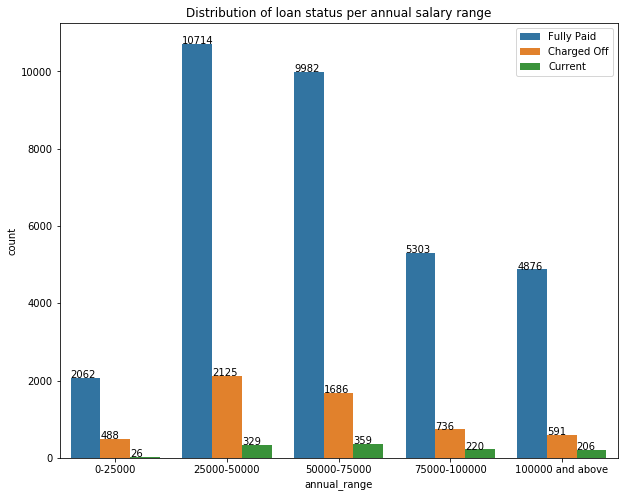

In [109]:
plt.figure(figsize=(10, 8))
a=sns.countplot(x="annual_range", hue = "loan_status", data=loan)
for p in a.patches:
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
    plt.title('Distribution of loan status per annual salary range')
plt.legend(loc='upper right')

plt.show()

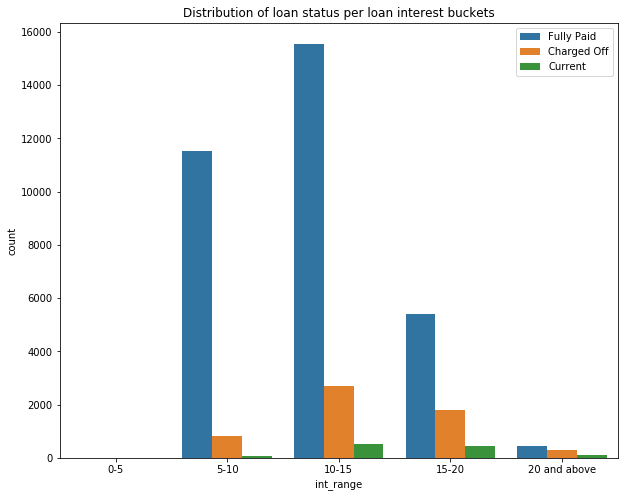

In [119]:
plt.figure(figsize=(10, 8))
sns.countplot(x="int_range", hue = "loan_status", data=loan)
plt.title('Distribution of loan status per loan interest buckets')
plt.legend(loc='upper right')

plt.show()

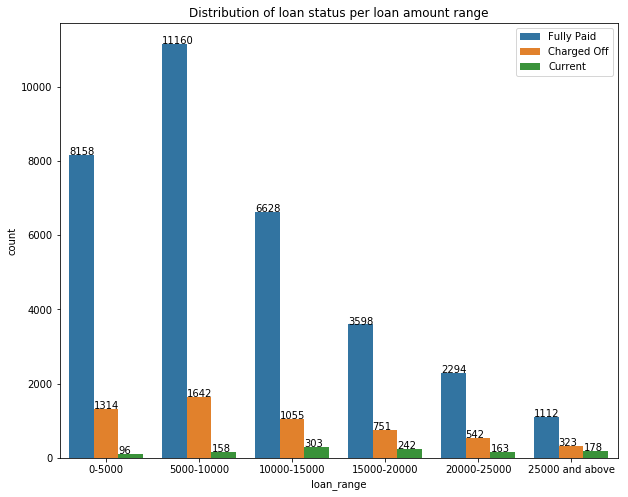

In [111]:
plt.figure(figsize=(10, 8))
a = sns.countplot(x="loan_range", hue = "loan_status",data=loan)
for p in a.patches:
    a.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
    plt.title('Distribution of loan status per loan amount range')
plt.legend(loc='upper right')

plt.show()

In [97]:
loan["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

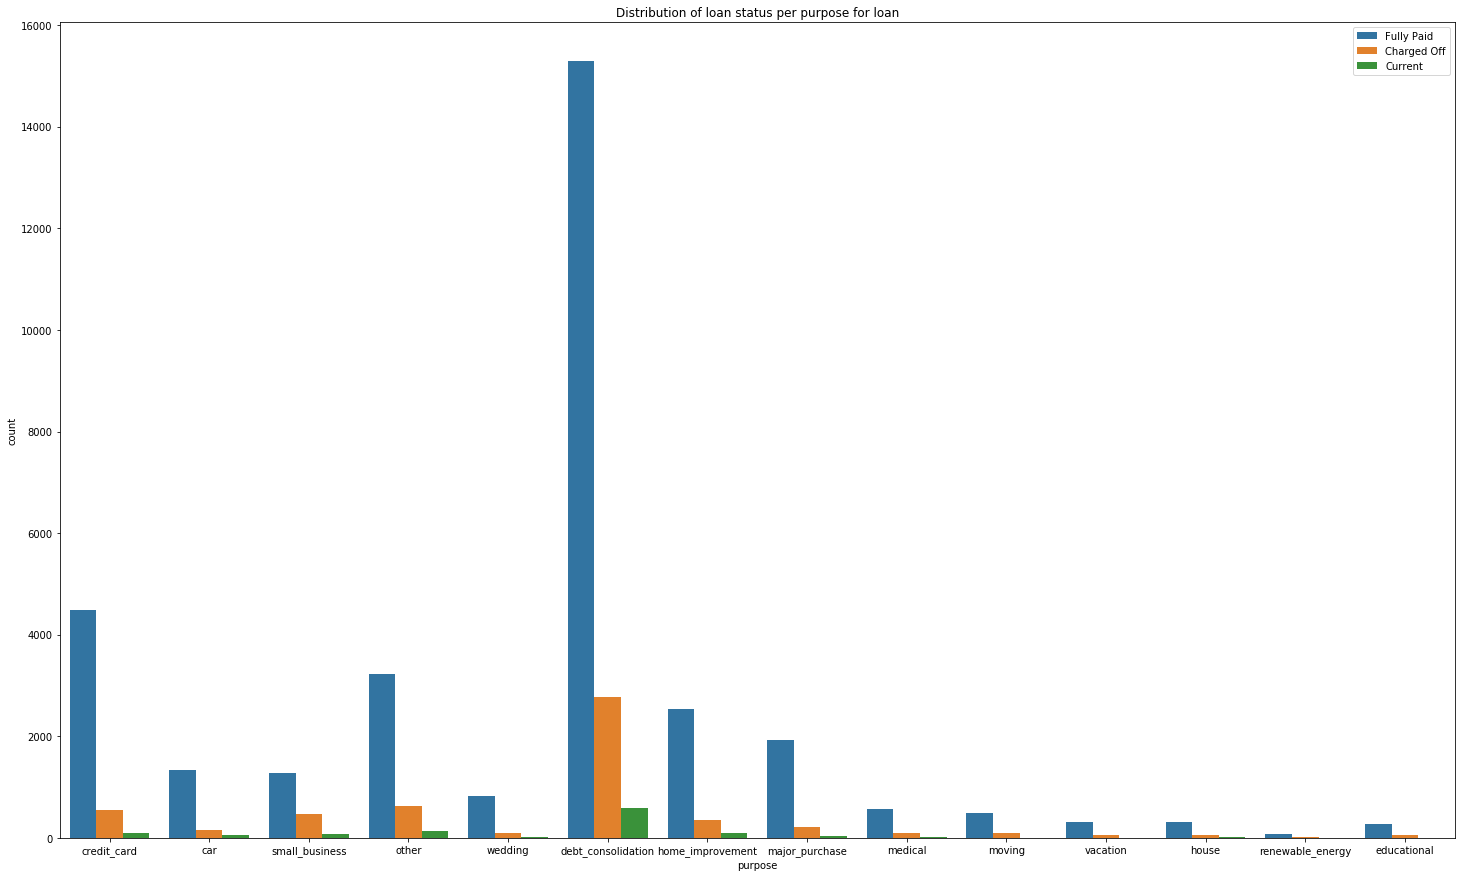

In [115]:
plt.figure(figsize=(25, 15))
sns.countplot(x="purpose",hue='loan_status', data=loan)
plt.title('Distribution of loan status per purpose for loan')
plt.legend(loc='upper right')
plt.show()

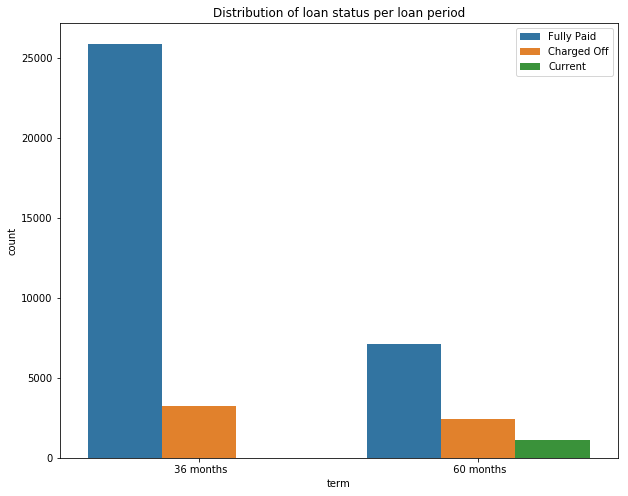

In [121]:
plt.figure(figsize=(10, 8))
sns.countplot(x="term",hue='loan_status', data=loan)
plt.title('Distribution of loan status per loan period')
plt.legend(loc='upper right')

plt.show()

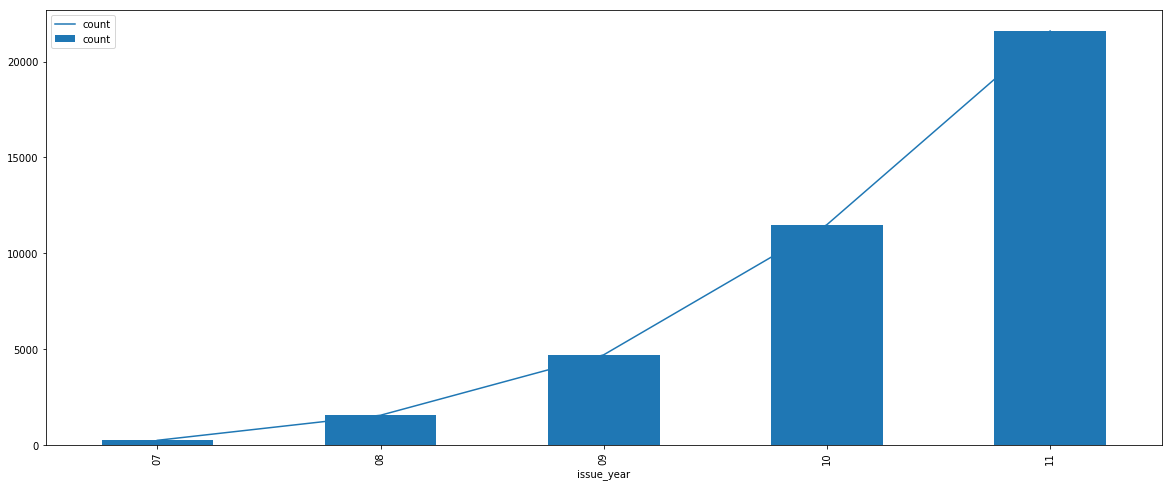

In [50]:
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

# Bivariate analysis

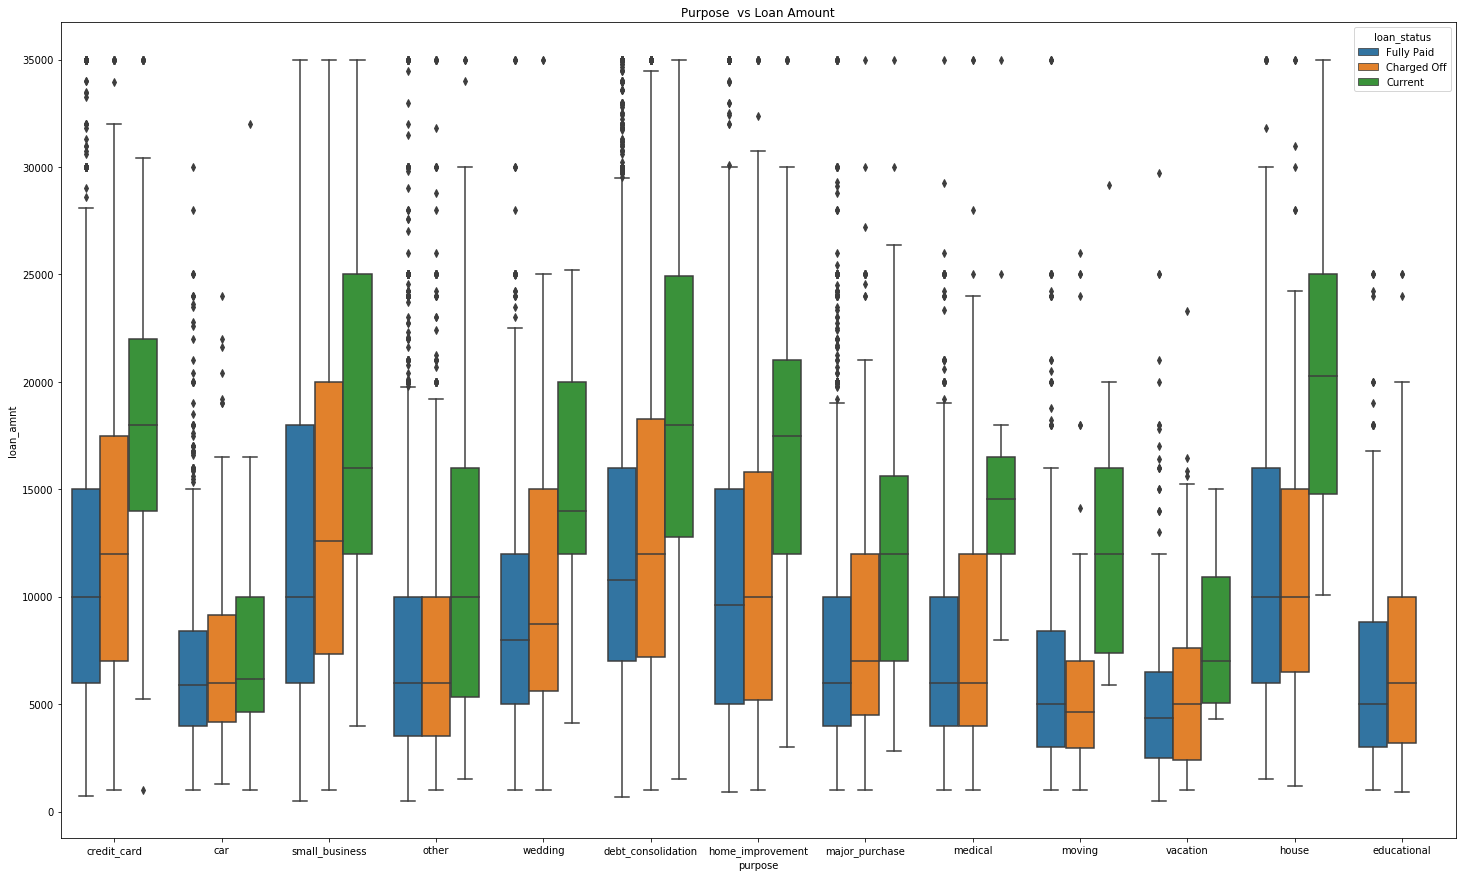

In [52]:
plt.figure(figsize=(25,15))
sns.boxplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose  vs Loan Amount')
plt.show()

loan to income ratio

In [30]:
loan['income_ratio']= loan['loan_amnt']/loan['annual_inc']
loan

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       9000.00000   
13     1069866    1304956       3000         3000       3000.00000   
15     1069759    1304871       1000         1000       1000.00000   
16     1065775    1299699      10000        10000      10000.00000   
17     1069971    1304884       3600         3600       3600.00000   
18     1062474    1294539       6000         6000       6000.00000   
19     1069742    1304855       9200         9200       9200.00000   
20     1069740    1284848      20250        20250      19142.16108   
21     1039153    1269083      21000        21000      21000.00000   
22     1069710    1304821      10000        10000      10000.00000   
23     1069700    1304810      10000        10000      10000.00000   
24     1069559    1304634       6000         6000       6000.00000   
25     1069697    1273773      15000        15000      15000.00000   
26     1069800    1304679      15000        15000       8725.00000   
28     1069799    1304678       4000         4000       4000.00000   
29     1047704    1278806       8500         8500       8500.00000   
30     1032111    1261745       4375         4375       4375.00000   
31     1069539    1304608      31825        31825      31825.00000   
32     1065420    1299514      10000        10000       9975.00000   
33     1069591    1304289       5000         5000       5000.00000   
34     1069530    1291365       7000         7000       7000.00000   
...        ...        ...        ...          ...              ...   
39685   100214     100208       5000         5000       3675.00000   
39686   111917     111912       6400         6400       4075.00000   
39687   111307     105982      12000        12000       2500.00000   
39688   111227     111223      20000        20000       2800.00000   
39689   109355     109346       1200         1200          0.00000   
39690   107136     107130      12250        12250       1525.00000   
39691   106360     106333       2700         2700        550.00000   
39693   106079     106039       3500         3500       1200.00000   
39694    90966      90962       5000         5000       4150.00000   
39695    92440      92423       5000         5000       3100.00000   
39696   102376      95212      25000        25000        525.00000   
39697   101579     100083      10000        10000        400.00000   
39698    98982      98957       5000         5000        675.00000   
39699    98339      97572       5100         5100        575.00000   
39700    98276      98268       5400         5400        200.00000   
39701    96844      95222       5300         5300        600.00000   
39702    96350      96338       5000         5000        850.00000   
39703    94838      73673       3000         3000       2550.00000   
39704    93277      93254       3000         3000        950.00000   
39705    93061      93057       5000         5000        250.00000   
39706    92676      92671       5000         5000        150.00000   
39707    92666      92661       5000         5000        525.00000   
39708    92552      92542       5000         5000        375.00000   
39709    92533      92529       5000         5000        675.00000   
39710    92507      92502       5000         5000        250.00000   
39711    92402      92

In [31]:
relation= loan.corr()
relation

id  member_id  loan_amnt  funded_amnt  \
id                       1.000000   0.993576   0.141789     0.151978   
member_id                0.993576   1.000000   0.140722     0.150024   
loan_amnt                0.141789   0.140722   1.000000     0.980929   
funded_amnt              0.151978   0.150024   0.980929     1.000000   
funded_amnt_inv          0.250331   0.258770   0.939139     0.957930   
int_rate                 0.076402   0.071522   0.320760     0.324084   
installment              0.085148   0.079395   0.927408     0.954299   
annual_inc               0.006377   0.007206   0.265721     0.261303   
dti                      0.092175   0.092756   0.070265     0.070055   
delinq_2yrs             -0.010436  -0.009809  -0.029624    -0.030493   
inq_last_6mths          -0.041686  -0.046451   0.008553     0.009134   
mths_since_last_delinq   0.119627   0.125538   0.013536     0.015443   
mths_since_last_record   0.694431   0.713410  -0.008508    -0.018535   
open_acc                 0.016309   0.014013   0.171567     0.169995   
pub_rec                 -0.022731  -0.021552  -0.056007    -0.056574   
revol_bal                0.003902   0.000180   0.323740     0.316924   
total_acc                0.037070   0.039611   0.255588     0.249513   
out_prncp                0.180260   0.170413   0.192439     0.194172   
out_prncp_inv            0.180228   0.170371   0.192109     0.193892   
total_pymnt              0.139955   0.139888   0.883492     0.900308   
total_pymnt_inv          0.221332   0.229843   0.851353     0.867998   
total_rec_prncp          0.111904   0.111872   0.847486     0.866063   
total_rec_int            0.172185   0.172534   0.726863     0.734609   
total_rec_late_fee      -0.048355  -0.051360   0.054071     0.056682   
recoveries               0.032298   0.030477   0.135608     0.136472   
collection_recovery_fee -0.014150  -0.015972   0.073073     0.075138   
last_pymnt_amnt          0.122832   0.124190   0.441749     0.446114   
pub_rec_bankruptcies    -0.014887  -0.013603  -0.042079    -0.042974   
income_ratio             0.098284   0.096589   0.599606     0.587587   

                         funded_amnt_inv  int_rate  installment  annual_inc  \
id                              0.250331  0.076402     0.085148    0.006377   
member_id                       0.258770  0.071522     0.079395    0.007206   
loan_amnt                       0.939139  0.320760     0.927408    0.265721   
funded_amnt                     0.957930  0.324084     0.954299    0.261303   
funded_amnt_inv                 1.000000  0.317026     0.902583    0.248668   
int_rate                        0.317026  1.000000     0.292480    0.053307   
installment                     0.902583  0.292480     1.000000    0.265775   
annual_inc                      0.248668  0.053307     0.265775    1.000000   
dti                             0.077181  0.112997     0.056878   -0.126420   
delinq_2yrs                    -0.036560  0.157116    -0.017018    0.022203   
inq_last_6mths                 -0.005798  0.134145     0.009347    0.036968   
mths_since_last_delinq          0.072813 -0.056273    -0.001949   -0.008631   
mths_since_last_record          0.440603  0.314507    -0.076787   -0.029843   
open_acc                        0.156897  0.016894     0.167613    0.151878   
pub_rec                        -0.056418  0.098568    -0.050645   -0.017804   
revol_bal                       0.295595  0.104019     0.319924    0.269895   
total_acc                       0.240830 -0.036684     0.229206    0.227867   
out_prncp                       0.202492  0.134399     0.123491    0.030545   
out_prncp_inv                   0.202506  0.134451     0.123339    0.030430   
total_pymnt                     0.878712  0.318968     0.852496    0.252541   
total_pymnt_inv                 0.910946  0.313636     0.812987    0.241697   
total_rec_prncp                 0.842108  0.194925     0.846151    0.254832   
total_rec_int                   0.728107  0.539393   

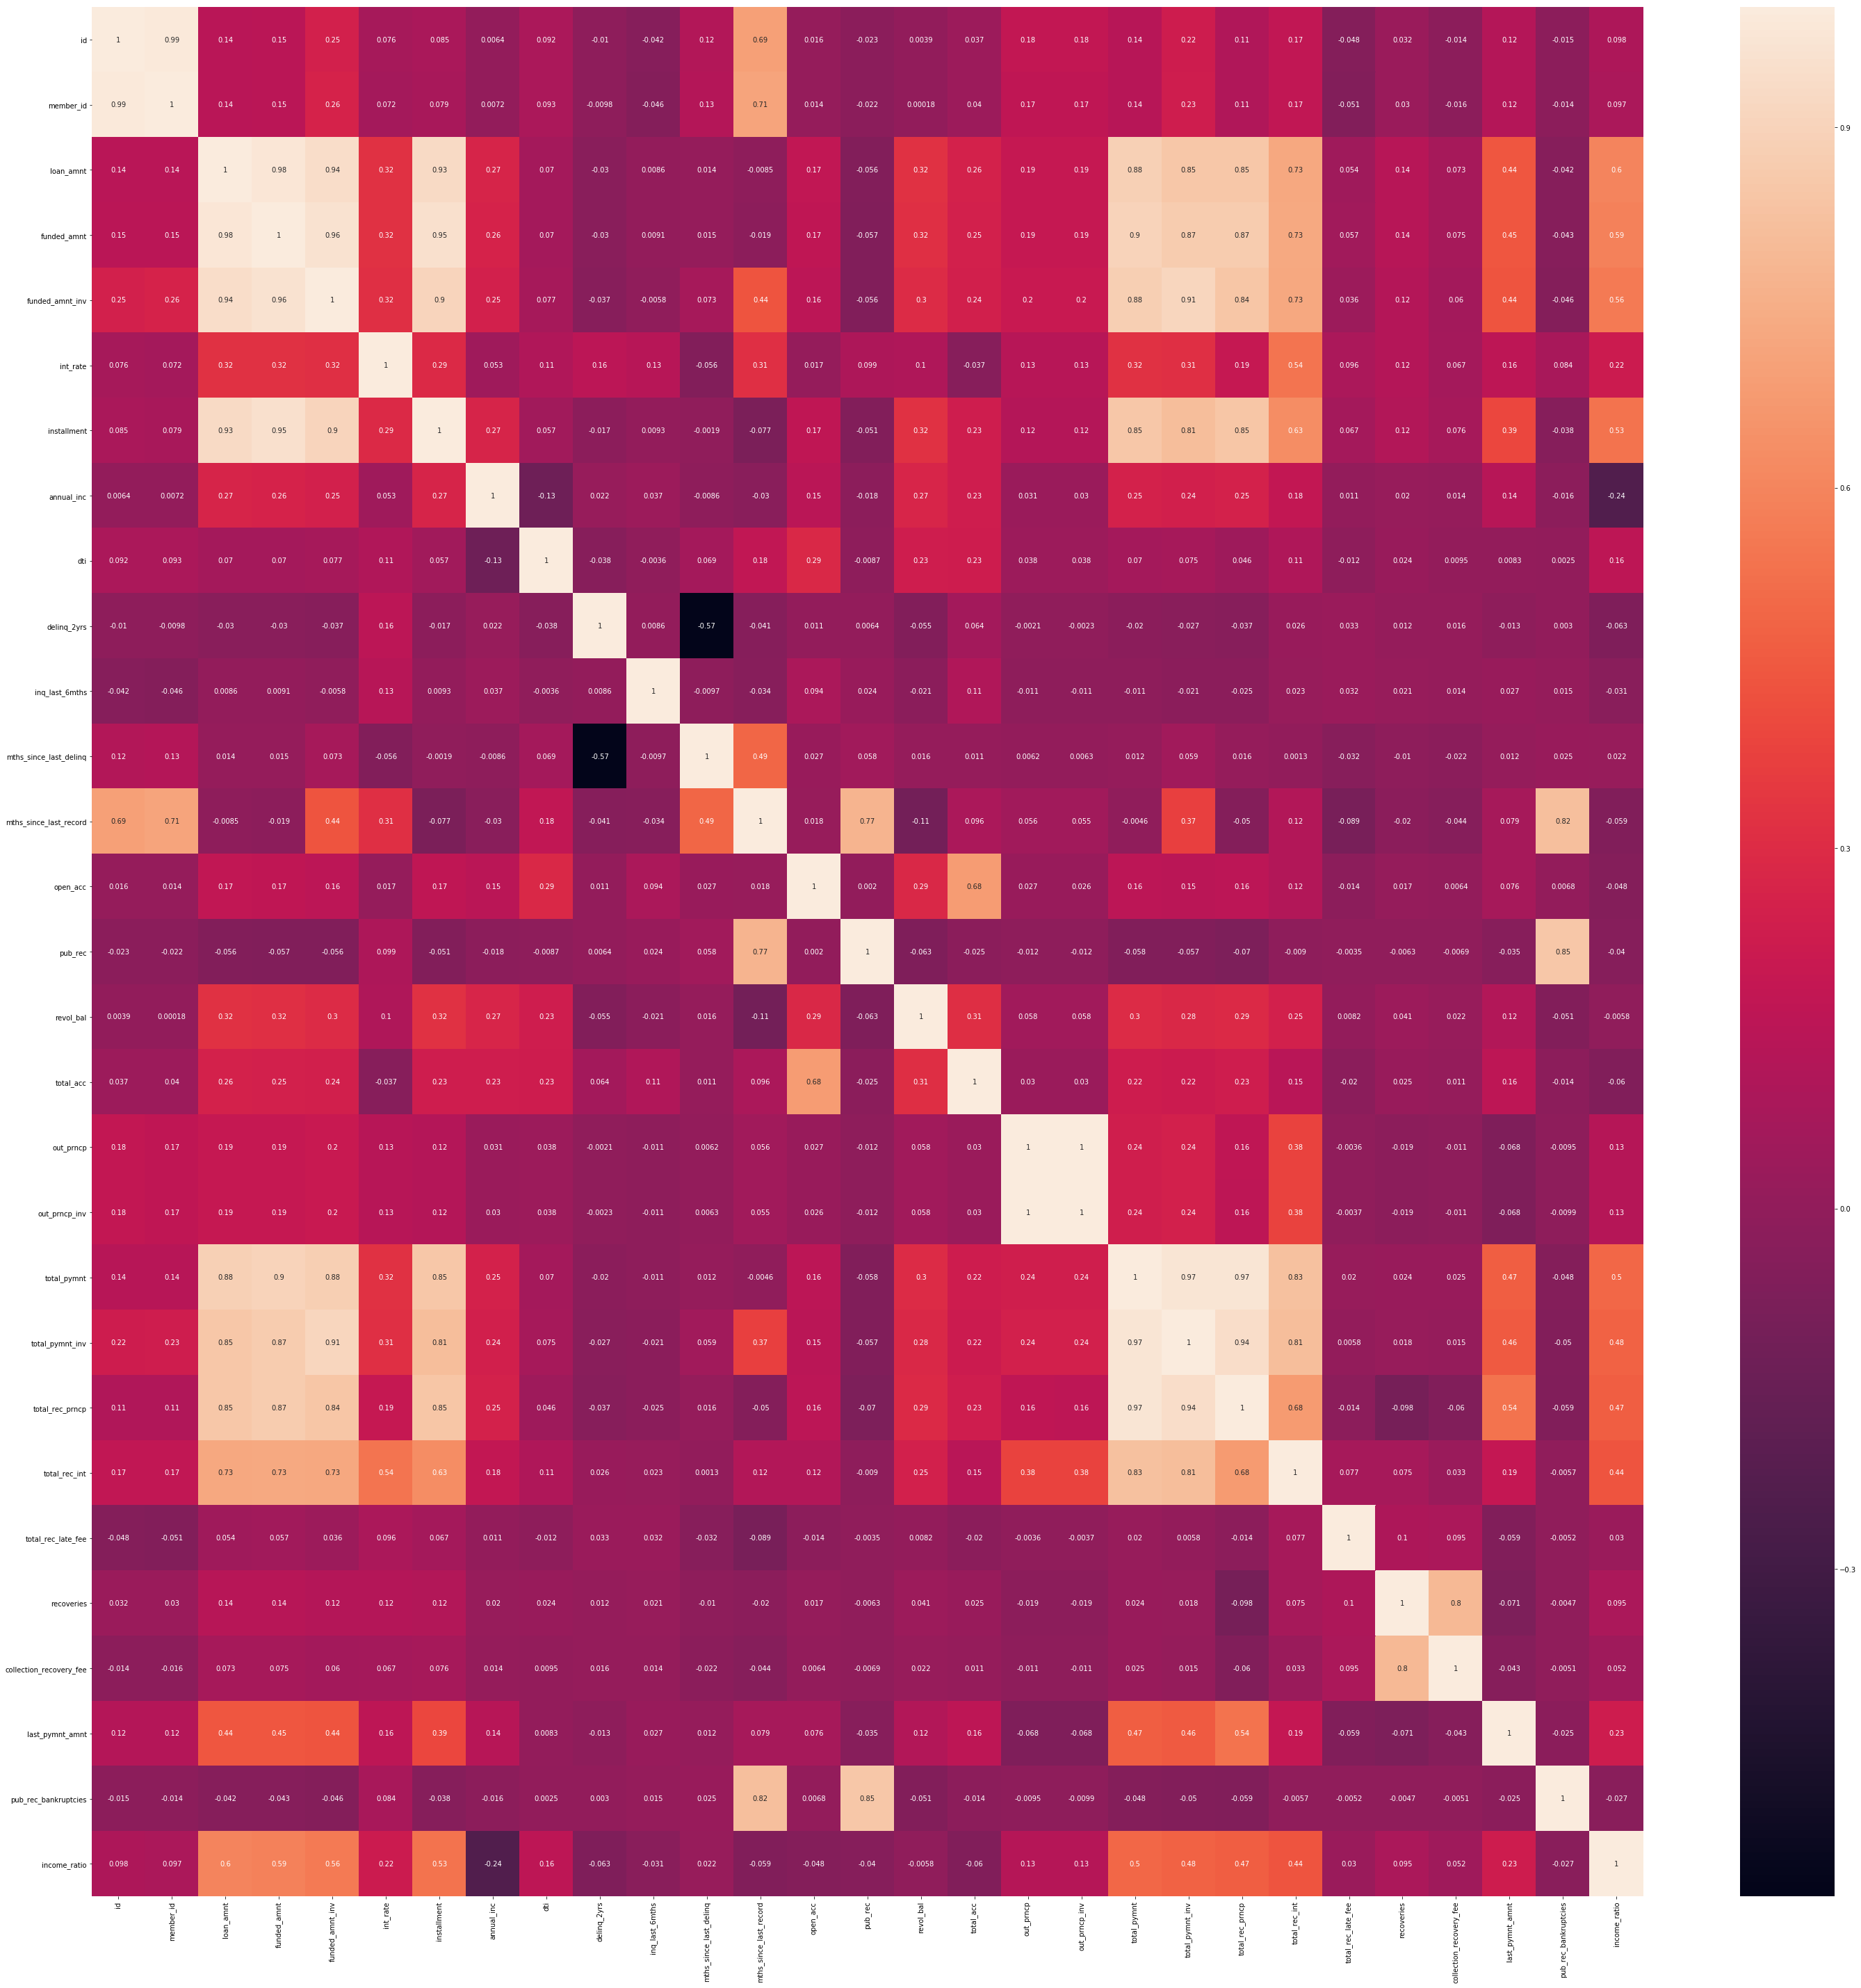

In [33]:
heat = plt.subplots(figsize=(50, 50))
sns.heatmap(relation, xticklabels=relation.columns.values ,yticklabels=relation.columns.values,annot= True)
plt.show()

In [122]:
def crosstab(df,col):
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [123]:
def prob(df,col,stacked= True):
    
   
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'r',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [124]:
states = loan.addr_state.value_counts()
states = states[(states < 20)]

loan_states = loan.drop(labels = loan[loan.addr_state.isin(states.index)].index)

loan_status  Charged Off  Current  Fully Paid   All  Probability_Charged Off
addr_state                                                                  
AK                    15        2          63    80                    0.188
AL                    54       17         381   452                    0.119
AR                    27       10         208   245                    0.110
AZ                   123       30         726   879                    0.140
CA                  1125      150        5824  7099                    0.158
CO                    98       26         668   792                    0.124
CT                    94       25         632   751                    0.125
DC                    15        3         196   214                    0.070
DE                    12        1         101   114                    0.105
FL                   504       85        2277  2866                    0.176
GA                   215       39        1144  1398                    0.154
HI                    28        8         138   174                    0.161
IL                   197       47        1281  1525                    0.129
KS                    31       16         224   271                    0.114
KY                    45       14         266   325                    0.138
LA                    53        9         374   436                    0.122
MA                   159       43        1138  1340                    0.119
MD                   162       26         861  1049                    0.154
MI                   103       16         601   720                    0.143
MN                    81       10         524   615                    0.132

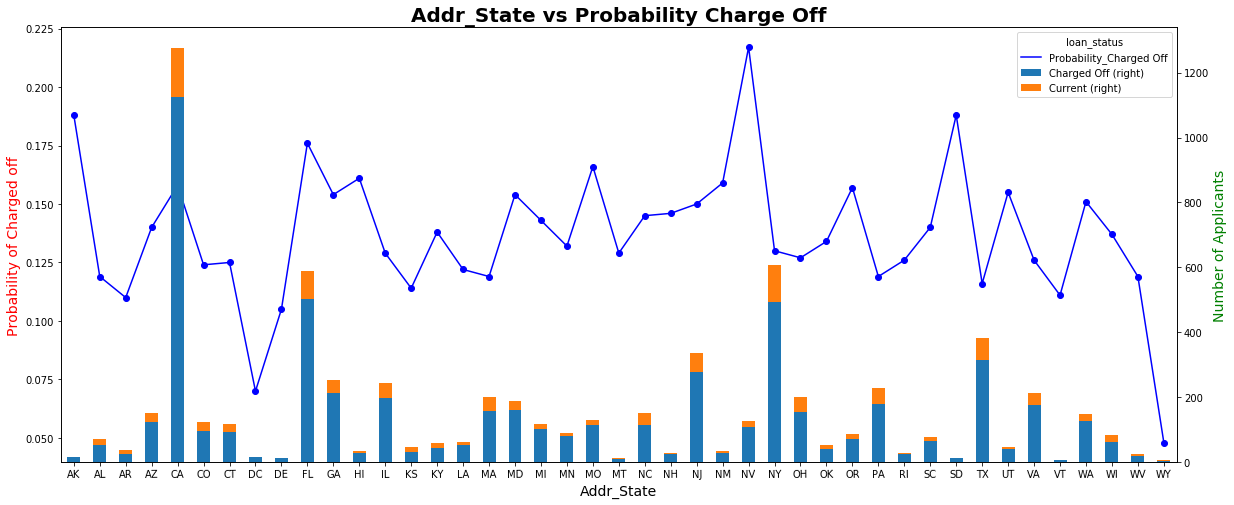

In [125]:
states = crosstab(loan_states,'addr_state')
display(states.head(20))

prob(df =loan_states,col ='addr_state')

loan_status       Charged Off  Current  Fully Paid    All  \
annual_range                                                
0-25000                   387       19        1711   2117   
25000-50000              1869      285        9551  11705   
50000-75000              1529      326        9058  10913   
75000-100000              672      198        4829   5175   
100000 and above          517      183        4475   5699   

loan_status       Probability_Charged Off  
annual_range                               
0-25000                             0.183  
25000-50000                         0.160  
50000-75000                         0.140  
75000-100000                        0.130  
100000 and above                    0.091

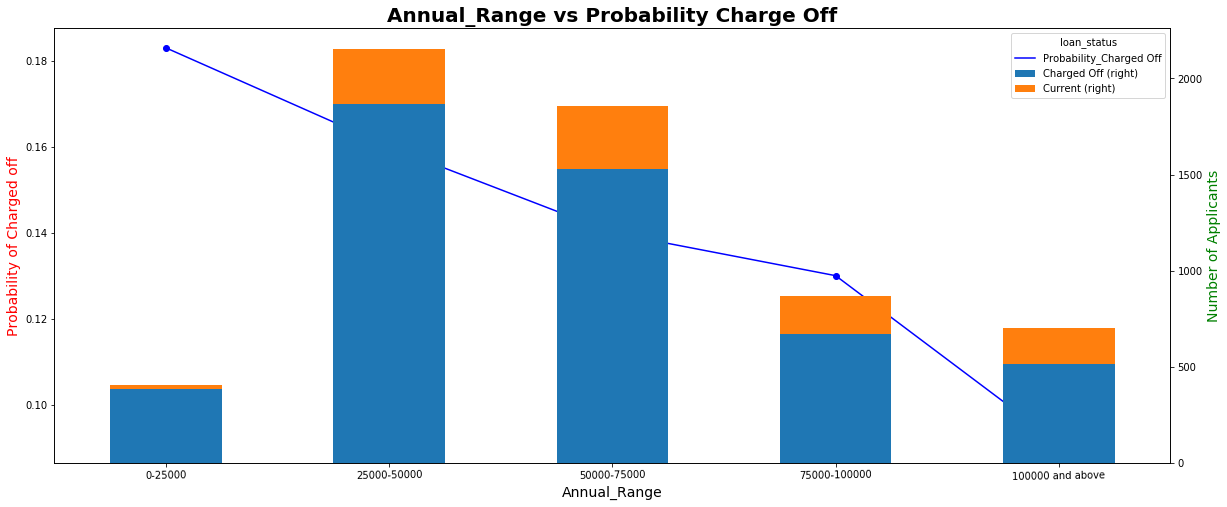

In [93]:
annual_inc_range = crosstab(loan,'annual_range')
display(annual_inc_range)

prob(df =loan,col ='annual_range')

loan_status         Charged Off  Current  Fully Paid    All  \
purpose                                                       
car                         160       50        1339   1549   
credit_card                 542      103        4485   5130   
debt_consolidation         2767      586       15288  18641   
educational                  56        0         269    325   
home_improvement            347      101        2528   2976   
house                        59       14         308    381   
major_purchase              222       37        1928   2187   
medical                     106       12         575    693   
moving                       92        7         484    583   
small_business              475       74        1279   1828   
vacation                     53        6         322    381   
wedding                      96       21         830    947   

loan_status         Probability_Charged Off  
purpose                                      
car                                   0.103  
credit_card                           0.106  
debt_consolidation                    0.148  
educational                           0.172  
home_improvement                      0.117  
house                                 0.155  
major_purchase                        0.102  
medical                               0.153  
moving                                0.158  
small_business                        0.260  
vacation                              0.139  
wedding                               0.101

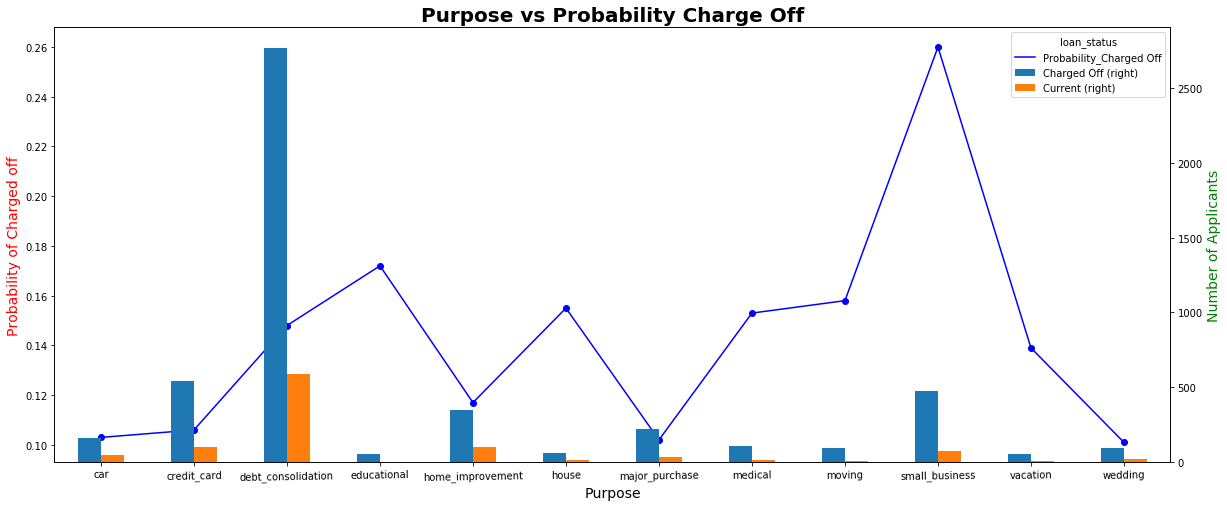

In [95]:
#purpose vs probablity
purpose = crosstab(loan,'purpose')
display(purpose)

prob(df =loan,col ='purpose',stacked=False)

loan_status  Charged Off  Current  Fully Paid    All  Probability_Charged Off
grade                                                                        
A                    514       31        8421   8966                    0.057
B                   1257      303        9211  10771                    0.117
C                   1173      242        5812   7227                    0.162
D                    994      196        3603   4793                    0.207
E                    649      162        1799   2610                    0.249
F                    298       63         601    962                    0.310
G                     90       14         188    292                    0.308

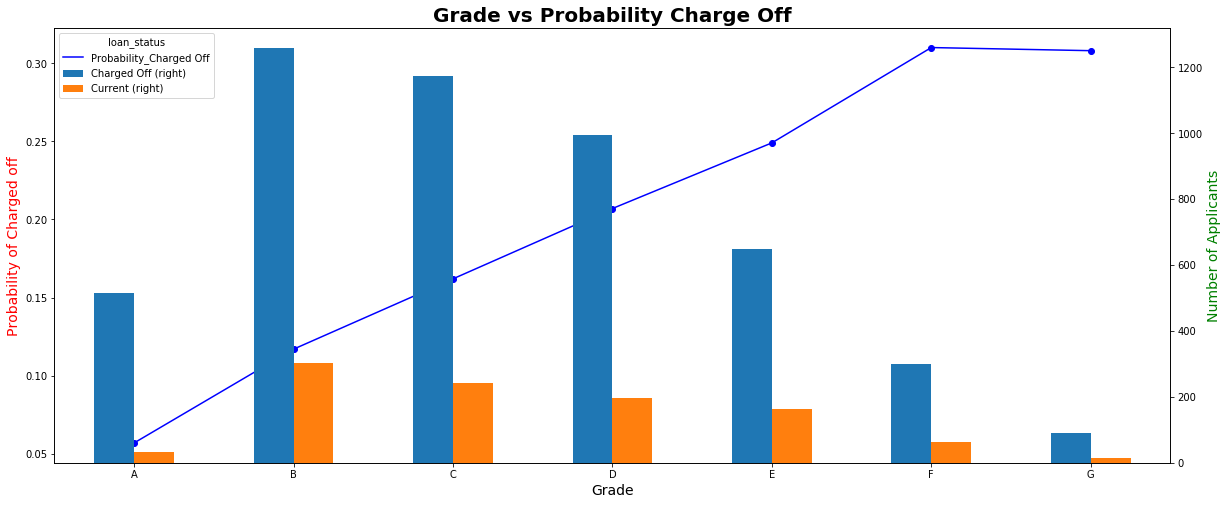

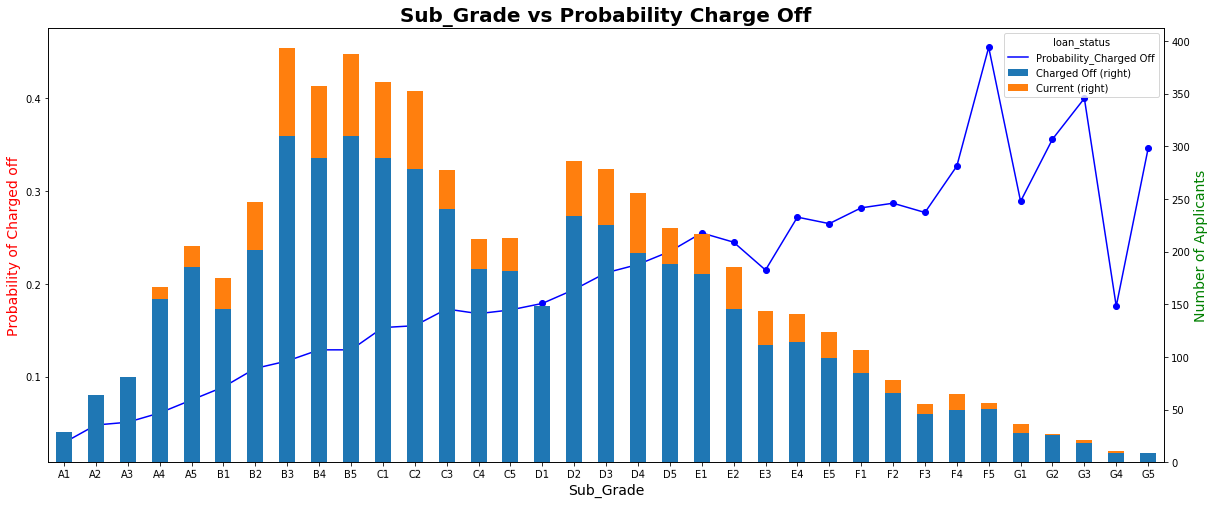

In [96]:
#grade/subdrade vs probablity charged off
grade = crosstab(loan,'grade')
display(grade)

prob(df =loan,col ='grade',stacked=False)
prob(df =loan,col ='sub_grade')

loan_status   Charged Off  Current  Fully Paid    All  Probability_Charged Off
int_range                                                                     
5-10                  708       64       10292   6971                    0.102
10-15                2390      471       13922  11064                    0.216
15-20                1605      389        4977  16783                    0.096
20 and above          272       87         444    803                    0.339

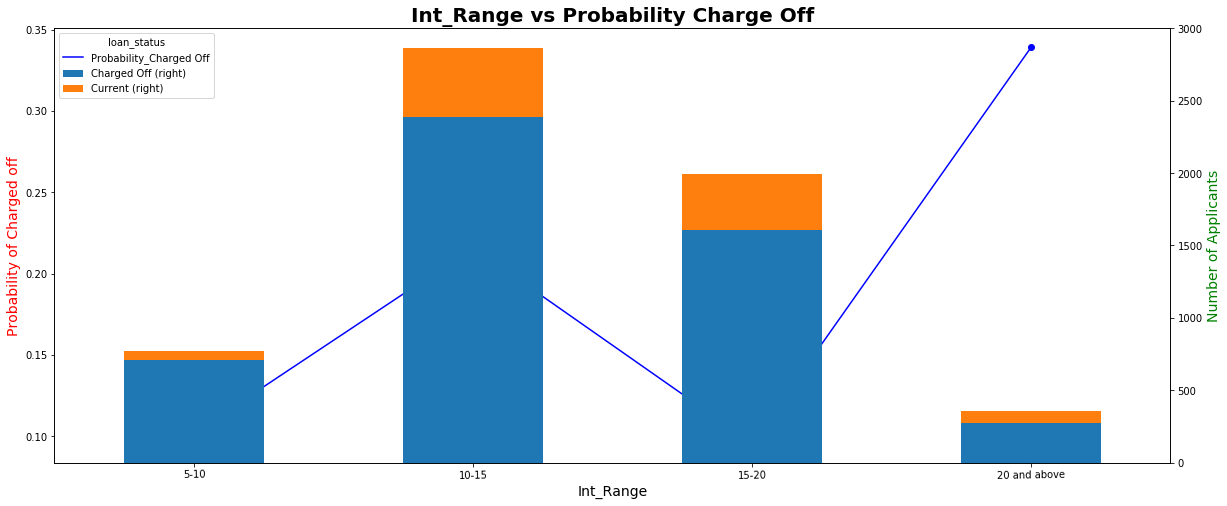

In [97]:
#interest range vs probablity
int_range = crosstab(loan,'int_range')
display(int_range)
prob(df =loan,col ='int_range')

loan_status  Charged Off  Current  Fully Paid   All  Probability_Charged Off
emp_length                                                                  
0                    190       34         683   907                    0.209
1 year               399       65        2405  2869                    0.139
10+ years           1185      360        6451  7996                    0.148
2 years              488       88        3352  3928                    0.124
3 years              489       67        3136  3692                    0.132
4 years              406       83        2614  3103                    0.131
5 years              415       78        2475  2968                    0.140
6 years              278       53        1702  2033                    0.137
7 years              234       54        1305  1593                    0.147
8 years              183       35        1123  1341                    0.136
9 years              145       30         963  1138                    0.127
< 1 year             563       64        3426  4053                    0.139

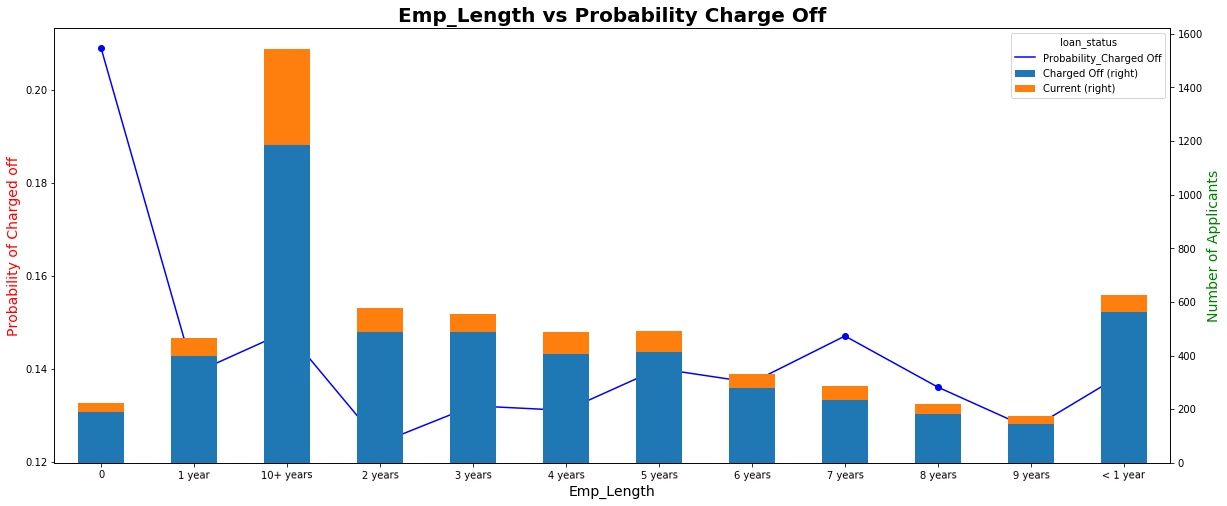

In [98]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)
prob(df =loan,col ='emp_length')